# Assignment 3: Exploring Tree-Based Regression Methods for 3D Sinusoidal Data
## DTSC 680: Applied Machine Learning

## Name: Betty Tai

## Directions and Overview

The main purpose of this assignment is for you to gain experience using tree-based methods to solve simple regression problems.  In this assignment, you will fit a `Gradient-Boosted Regression Tree`, a `Random Forest`, and a `Decision Tree` to a noisy 3D sinusoidal data set.  Since these models can be trained very quickly on the supplied data, I want you to first manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, you should manually sweep the hyperparameter space and try to hone in on the optimal hyperparameter values, again, _manually_.  (Yep, that means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

But wait, there's more! Merely attempting to identify the optimal hyperparameter values is not enough.  Be sure to really get a visceral understanding of how altering a hyperparameter in turn alters the model predictions (i.e. the prediction curve).  This is how you will build your machine learning intuition!

So, play around and build some models.  When you are done playing with hyperparameter values, you should try to set these values to the optimal values manually.  Then, retrain the model.  Next in this assignment, we will perform several grid searches, so you'll be able to compare your "optimal" hyperparameter values with those computed from the grid search.

We will visualize model predictions for the optimal `Gradient-Boosted Regresstion Tree`, a `Random Forest`, and `Decision Tree` models that were determined by the grid searches.  Next, you will compute the generalization error on the test set for the three models.

## Preliminaries

Let's import some common packages:

In [16]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from matplotlib import rcParams
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot3Ddata(data_df):
        ### ENTER CODE HERE ###
    rcParams['font.family'] = 'Times New Roman'
    fig = plt.figure(figsize=(11,11))
    fig.subplots_adjust(hspace=0, wspace=0)
    ax1 = fig.add_subplot(2,2,1, projection='3d')
    ax2 = fig.add_subplot(2,2,2, projection='3d')
    ax3 = fig.add_subplot(2,2,3, projection='3d')
    ax4 = fig.add_subplot(2,2,4, projection='3d')
    from sklearn.linear_model import LinearRegression
    # Data for three-dimensional scattered points
    # I isolated the pandas series of df["insert here"] of different axes. 
    [xdata, ydata, zdata] = [data_df[0], data_df[1], data_df[2]]
    scatter_plot1 = ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap=plt.get_cmap("Blues"));
    scatter_plot2 = ax2.scatter3D(xdata, ydata, zdata, c=zdata, cmap=plt.get_cmap("Blues"));
    scatter_plot3 = ax3.scatter3D(xdata, ydata, zdata, c=zdata, cmap=plt.get_cmap("Blues"));
    scatter_plot4 = ax4.scatter3D(xdata, ydata, zdata, c=zdata, cmap=plt.get_cmap("Blues"));

    # calling the class view_init is needed to change the angles we are looking at. I iteratively guessed on the numbers 
    # until I found the right view. I don't think its perfect but it's close enough. 
    left_top = ax1.view_init(0, 90)
    right_top = ax2.view_init(39,0)
    bottom_left = ax3.view_init(35, 45)
    bottom_right = ax4.view_init(20, 20)
    
    ax1.set_xlim3d(0, 14)
    ax1.set_ylim3d(-6, 6)
    ax1.set_zlim3d(0, 8)
    ax2.set_xlim3d(0, 14)
    ax2.set_ylim3d(-6, 6)
    ax2.set_zlim3d(0, 8)
    ax3.set_xlim3d(0, 14)
    ax3.set_ylim3d(-6, 6)
    ax3.set_zlim3d(0, 8)
    ax4.set_xlim3d(0, 14)
    ax4.set_ylim3d(-6, 6)
    ax4.set_zlim3d(0, 8)

    ## setting labels for axes
    ax1.set_xlabel('x', color = "brown")
    ax1.set_ylabel('y', color = "brown")
    ax1.set_zlabel('z', color = "brown")
    ax2.set_xlabel('x', color = "brown")
    ax2.set_ylabel('y', color = "brown")
    ax2.set_zlabel('z', color = "brown")
    ax3.set_xlabel('x', color = "brown")
    ax3.set_ylabel('y', color = "brown")
    ax3.set_zlabel('z', color = "brown")
    ax4.set_xlabel('x', color = "brown")
    ax4.set_ylabel('y', color = "brown")
    ax4.set_zlabel('z', color = "brown")
    fig.tight_layout()
    plt.show()
    
def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
            ### ENTER CODE HERE ###
    rcParams['font.family'] = 'Times New Roman'
    fig = plt.figure(figsize=(11,11))
    fig.subplots_adjust(hspace=0, wspace=0)
    ax1 = fig.add_subplot(2,2,1, projection='3d')
    ax2 = fig.add_subplot(2,2,2, projection='3d')
    ax3 = fig.add_subplot(2,2,3, projection='3d')
    ax4 = fig.add_subplot(2,2,4, projection='3d')
    
    axes = [0,14,-6,6,0,8]
    x1 = np.linspace(axes[0], axes[1], 100) 
    # Data for three-dimensional scattered points
    # I isolated the pandas series of df["insert here"] of different axes. 
    #[xdata, ydata, zdata] = [scat_x, scat_y, scat_z]
    ax1.scatter3D(scat_x, scat_y, scat_z, c=scat_z, cmap=plt.get_cmap("Blues"));
    ax2.scatter3D(scat_x, scat_y, scat_z, c=scat_z, cmap=plt.get_cmap("Blues"));
    ax3.scatter3D(scat_x, scat_y, scat_z, c=scat_z, cmap=plt.get_cmap("Blues"));
    ax4.scatter3D(scat_x, scat_y, scat_z, c=scat_z, cmap=plt.get_cmap("Blues"));
    #ax1.scatter3D(x1, fit_y, fit_z, c=fit_z, cmap=plt.get_cmap("Oranges"));
    #ax2.scatter3D(x1, fit_y, fit_z, c=fit_z, cmap=plt.get_cmap("Oranges"));
    #ax3.scatter3D(x1, fit_y, fit_z, c=fit_z, cmap=plt.get_cmap("Oranges"));
    #ax4.scatter3D(x1, fit_y, fit_z, c=fit_z, cmap=plt.get_cmap("Oranges"));    
    ax1.plot3D(fit_x, fit_y, fit_z, 'black')
    ax2.plot3D(fit_x, fit_y, fit_z, 'black')
    ax3.plot3D(fit_x, fit_y, fit_z, 'black')
    ax4.plot3D(fit_x, fit_y, fit_z, 'black')
    # calling the class view_init is needed to change the angles we are looking at. I iteratively guessed on the numbers 
    # until I found the right view. I don't think its perfect but it's close enough. 
    left_top = ax1.view_init(0, 90)
    right_top = ax2.view_init(39,0)
    bottom_left = ax3.view_init(35, 45)
    bottom_right = ax4.view_init(20, 20)
    
    ax1.set_xlim3d(0, 14)
    ax1.set_ylim3d(-6, 6)
    ax1.set_zlim3d(0, 8)
    ax2.set_xlim3d(0, 14)
    ax2.set_ylim3d(-6, 6)
    ax2.set_zlim3d(0, 8)
    ax3.set_xlim3d(0, 14)
    ax3.set_ylim3d(-6, 6)
    ax3.set_zlim3d(0, 8)
    ax4.set_xlim3d(0, 14)
    ax4.set_ylim3d(-6, 6)
    ax4.set_zlim3d(0, 8)

    ## setting labels for axes
    ax1.set_xlabel('x', color = "brown")
    ax1.set_ylabel('y', color = "brown")
    ax1.set_zlabel('z', color = "brown")
    ax2.set_xlabel('x', color = "brown")
    ax2.set_ylabel('y', color = "brown")
    ax2.set_zlabel('z', color = "brown")
    ax3.set_xlabel('x', color = "brown")
    ax3.set_ylabel('y', color = "brown")
    ax3.set_zlabel('z', color = "brown")
    ax4.set_xlabel('x', color = "brown")
    ax4.set_ylabel('y', color = "brown")
    ax4.set_zlabel('z', color = "brown")
    fig.tight_layout()
    plt.show()
    


# Import and Split Data

Complete the following:



1. Begin by importing the data from the file called `3DSinusoidal.csv`.  Name the returned DataFrame `data`. 

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively.  Specify the `random_state` parameter to be `42` (do this throughout the entire note book).

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.read_csv('3DSinusoidal.csv')

X = data['x']
y = data['y']
z = data['z']

X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=.2, random_state=42)

# Reshape X Data and Make NumPy Arrays
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train)
y_test = np.array(y_test)
z_train = np.array(z_train)
z_test = np.array(z_test)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Plot Data

Simply plot your training data here, so that you know what you are working with.  You must define a function called `plot3Ddata`, which accepts a Pandas DataFrame (in this case, called `train_df` that is composed of 3 spatial coordinates) and uses `scatter3D()` to plot the data.  Use this function to plot only the training data (recall that you don't even want to look at the test set, until you are ready to calculate the generalization error).  You must place the definition of this function in the existing code cell of the above __Preliminaries__ section (The function header is already there - you must complete the function definition.)

You must emulate the graphs shown in the respective sections below. Each of the graphs will have four subplots. Note the various viewing angles that each subplot presents - you can achieve this with the view_init() method. Be sure to label your axes as shown.

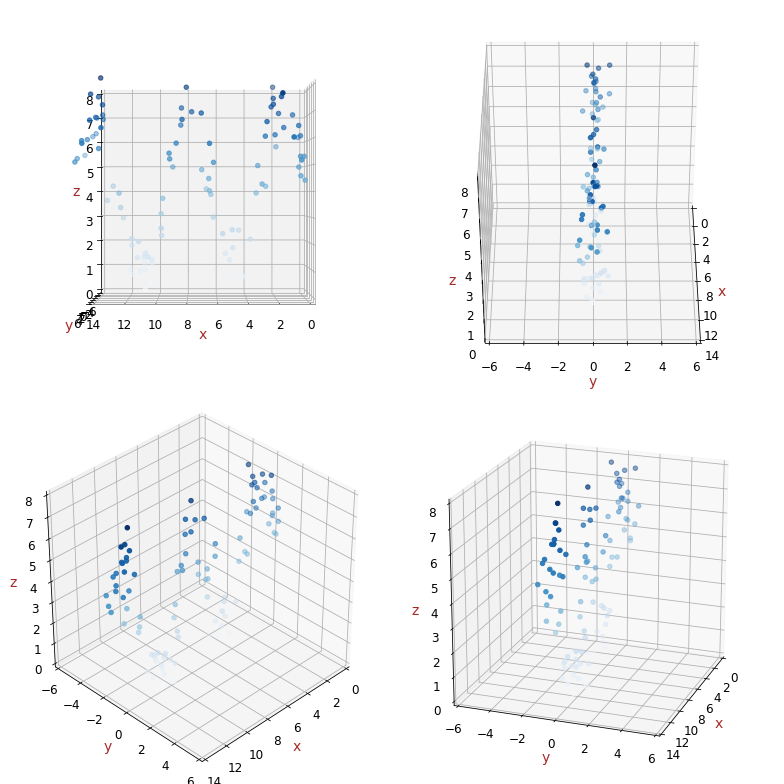

In [19]:
train_df = [X_train,y_train,z_train]
plot3Ddata(train_df)

## A Quick Note

In the following sections you will be asked to plot the training data along with the model's predictions for that data superimposed on it.  You must write a function called `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` that will plot this figure.  The function accepts six parameters as input, shown in the function signature.  All six input parameters must be NumPy arrays.  The Numpy arrays called `fit_x` and `fit_y` represent the x and y coordinates from the training data and `fit_z` represents the model predictions from those coordinates (i.e. the prediction curve).  The three Numpy arrays called `scat_x, scat_y,` and  `scat_z` represent the original x, y, and z coordinates of the training data.   

You must place the definition of the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function in the existing code cell of the above __Preliminaries__ section. (The function header is already there - you must complete the function definition.)

You will use the `plotscatter3Ddata()` function in each of the below __Plot Model Predictions for Training Set__ portion of the three __Explore 3D Linear Data__ sections, as well as the __Visualize Optimal Model Predictions__ section.

___Important: Below, you will be asked to plot the model's prediction curve along with the training data.  Even if you correctly train the model, you may find that your trendline is very ugly when you first plot it.  If this happens to you, try plotting the model's predictions using a scatter plot rather than a connected line plot.  You should be able to infer the problem and solution with plotting the trendline from examining this new scatter plot of the model's predictions.___

# Explore 3D Sinusoidal Data: GradientBoostingRegressor

Fit a `GradientBoostingRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  When you are done playing, set these to the best values you can for submission.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

 - `learning_rate = 0.5333333333333334`
 - `max_depth = 1`
 - `n_estimators = 150`
 - `random_state = 42`

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

X_new1 = np.c_[train_df[0].ravel(), train_df[1].ravel()]
#params = {'max_depth': [20], 'n_estimators': [1], 'learning_rate': [1]}
params = {'max_depth': np.arange(1,10,2), 'n_estimators': np.arange(150,250,25), 'learning_rate': np.linspace(0.2, .8, 10)}
grid_search_cv = GridSearchCV(GradientBoostingRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_new1, z_train)

print("The best parameters are: ", grid_search_cv.best_params_)

gbrt = GradientBoostingRegressor(**grid_search_cv.best_params_, max_features=2, random_state=42)
X_new1 = np.c_[train_df[0].ravel(), train_df[1].ravel()]
gbrt.fit(X_new1, train_df[2])

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'learning_rate': 0.5333333333333334, 'max_depth': 1, 'n_estimators': 150}


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   25.9s finished


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5333333333333334,
                          loss='ls', max_depth=1, max_features=2,
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=150, n_iter_no_change=None,
                          presort='deprecated', random_state=42, subsample=1.0,
                          tol=0.0001, validation_fraction=0.1, verbose=0,
                          warm_start=False)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

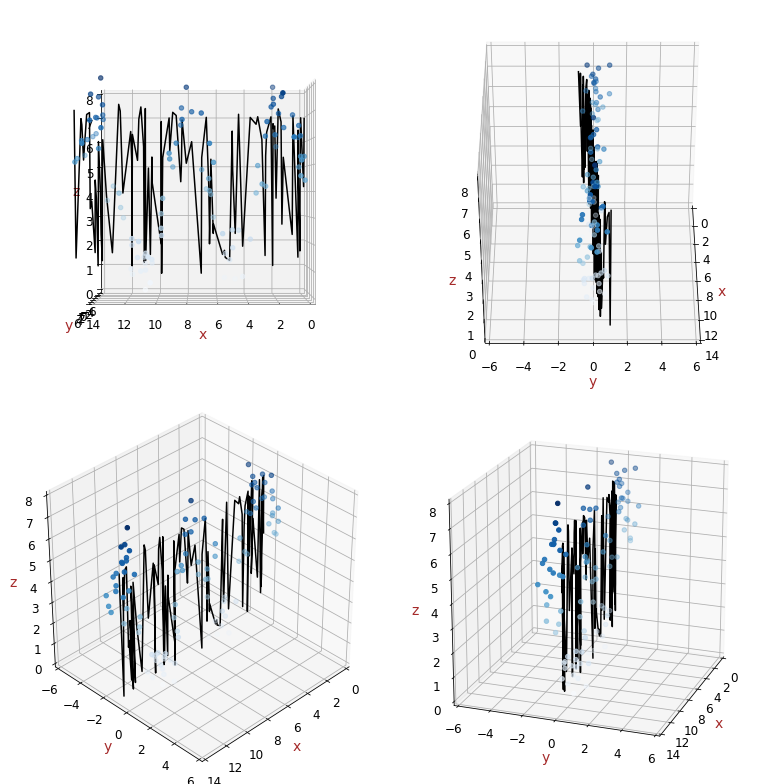

In [21]:
#The Numpy arrays called fit_x and fit_y represent the x and y coordinates from the training data and 
#fit_z represents the model predictions from those coordinates (i.e. the prediction curve). 
axes=[0,14,-6,6,0,8]
x1 = np.linspace(axes[4], axes[5], 100).reshape(-1,1)
z_train_fit = train_df[2].reshape(-1,1)
fit_x=np.sort(train_df[0], axis=0)
fit_y=np.sort(train_df[1])
fit_z=gbrt.predict(X_new1)
scat_x=train_df[0]
scat_y=train_df[1]
scat_z=train_df[2]
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

# Explore 3D Sinusoidal Data: RandomForestRegressor

Fit a `RandomForestRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  When you are done playing, set these to the best values you can for submission.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

 - `min_samples_split = 2`
 - `max_depth = 8`
 - `n_estimators = 240`
 - `random_state = 42`

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X_new1 = np.c_[train_df[0].ravel(), train_df[1].ravel()]
params = {'min_samples_split': np.arange(2,10,2), 'max_depth': np.arange(5,9), 'n_estimators': np.arange(150,250,10)}
grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_new1, z_train)

print("The best parameters are: ", grid_search_cv.best_params_)

rfr = RandomForestRegressor(**grid_search_cv.best_params_, max_features=2, random_state=42)
X_new1 = np.c_[train_df[0].ravel(), train_df[1].ravel()]
rfr.fit(X_new1, train_df[2])

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  1.9min finished


The best parameters are:  {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 240}


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=240, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

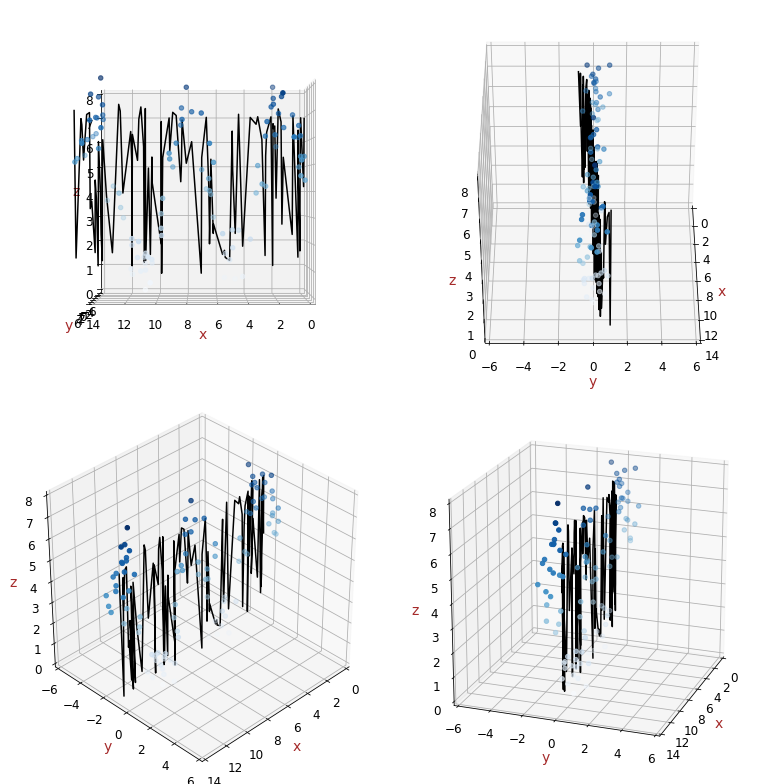

In [23]:
x1 = np.linspace(axes[4], axes[5], 100).reshape(-1,1)
z_train_fit = train_df[2].reshape(-1,1)
fit_x=np.sort(train_df[0], axis=0)
fit_y=np.sort(train_df[1])
fit_z=gbrt.predict(X_new1)
scat_x=train_df[0]
scat_y=train_df[1]
scat_z=train_df[2]
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

# Explore 3D Sinusoidal Data: DecisionTreeRegressor

Fit a `DecisionTreeRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  When you are done playing, set these to the best values you can for submission.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

 - `splitter = <value>`
 - `max_depth = <value>`
 - `min_samples_split = <value>`
 - `random_state = 42`

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

X_new1 = np.c_[train_df[0].ravel(), train_df[1].ravel()]
params = {'splitter': ["random", "best"], 'max_depth': np.arange(1,20,1), 'min_samples_split': np.arange(2,32,1)}
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_new1, train_df[2])

print("The best parameters are: ", grid_search_cv.best_params_)

dtr = DecisionTreeRegressor(**grid_search_cv.best_params_, max_features=2, random_state=42)
X_new1 = np.c_[train_df[0].ravel(), train_df[1].ravel()]
dtr.fit(X_new1, train_df[2])

Fitting 3 folds for each of 1140 candidates, totalling 3420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'max_depth': 7, 'min_samples_split': 10, 'splitter': 'best'}


[Parallel(n_jobs=1)]: Done 3420 out of 3420 | elapsed:    5.0s finished


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

Note: I couldn't get a reasonable model by merely playing around with the hyperparameter values manually - this is clear from my example curve below.  Maybe you have a better intuition?

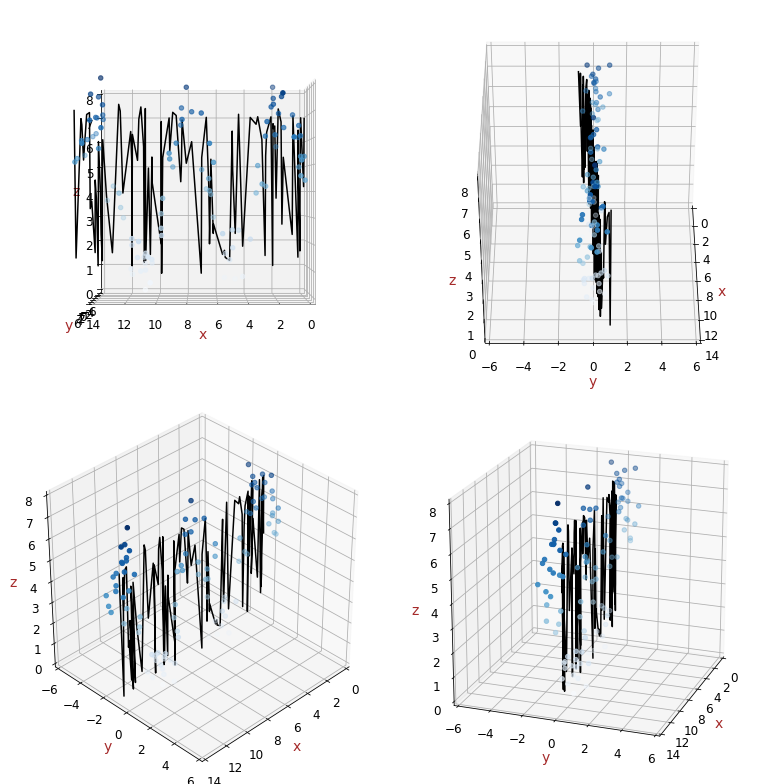

In [25]:
fit_x=np.sort(train_df[0], axis=0)
fit_y=np.sort(train_df[1])
fit_z=gbrt.predict(X_new1)
scat_x=train_df[0]
scat_y=train_df[1]
scat_z=train_df[2]
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

# Perform Grid Searches

You will perform a series of grid searches, which will yield the optimal hyperparamter values for each of the three model types and the range of values probed.  You can compare the values computed by the grid search with the values you manually found earlier.  How do these compare?

You must perform a course-grained grid search, with a very broad range of values first.  Then, you perform a second grid search using a tighter range of values centered on those identified in the first grid search.  You may have to use another round of grid searching too (it took me ___four rounds___ of grid searches for some of the below models).

Note the following:

1. Be sure to clearly report the optimal hyperparameters in the designated location after you calculate them!

2. You must use `random_state=42` everywhere that it is needed in this notebook.

3. You must use grid search to compute the following hyperparameters:

   GradientBoostingRegressor:
    
     - `max_depth = <value>`
     - `n_estimators = <value>`
     - `learning_rate = <value>`

   RandomForestRegressor:
    
     - `max_depth = <value>`
     - `n_estimators = <value>`
     - `min_samples_split = <value>`

   DecisionTreeRegressor:
    
     - `splitter = <value>`
     - `max_depth = <value>`
     - `min_samples_split = <value>`
     
     
4. The learning_rate hyperparameter for the `GradientBoostingRegressor` class must be specified to 3 sigificant digits.



## Perform Individual Model Grid Searches

In this section you will perform a series of grid searches to compute the optimal hyperparameter values for each of the three model types.  The learning_rate hyperparameter for the `GradientBoostingRegressor` class must be specified to 3 sigificant digits.

In [26]:
### ENTER CODE HERE ###

# -----
# Coarse-Grained GradientBoostingRegressor GridSearch
# -----

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

X_new1 = np.c_[train_df[0].ravel(), train_df[1].ravel()]
params = {'max_depth': np.arange(1,32,2), 'n_estimators': np.arange(1,1000,10), 'learning_rate': np.arange(0.0001, 0.01, 100)}
grid_search_cv = GridSearchCV(GradientBoostingRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_new1, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed: 12.3min finished


The best parameters are:  {'learning_rate': 0.0001, 'max_depth': 7, 'n_estimators': 991}


In [27]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----


params = {'max_depth': np.arange(1,32,2), 'n_estimators': np.arange(1,1000,10), 'learning_rate': np.arange(0.0001, 0.01, 100)}
grid_search_cv = GridSearchCV(GradientBoostingRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_new1, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed: 12.3min finished


The best parameters are:  {'learning_rate': 0.0001, 'max_depth': 7, 'n_estimators': 991}


In [28]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----


params = {'max_depth': np.arange(1,32,2), 'n_estimators': np.arange(1,1000,10), 'learning_rate': np.arange(0.0001, 0.01, 100)}
grid_search_cv = GridSearchCV(GradientBoostingRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_new1, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed: 12.4min finished


The best parameters are:  {'learning_rate': 0.0001, 'max_depth': 7, 'n_estimators': 991}


On this dataset, the optimal model parameters for the `GradientBoostingRegressor` class are:

- `learning_rate = <value>`
- `max_depth = <value>`
- `n_estimators = <value>`

In [29]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----


params = {'min_samples_split': np.arange(2,10,2), 'max_depth': np.arange(5,9), 'n_estimators': np.arange(150,250,10)}
grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_new1, z_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  1.9min finished


The best parameters are:  {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 240}


In [31]:
# -----
# Refined RandomForestRegressor GridSearch
# -----


params = {'min_samples_split': np.arange(2,10,2), 'max_depth': np.arange(5,9), 'n_estimators': np.arange(150,250,10)}
grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_new1, z_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  1.9min finished


The best parameters are:  {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 240}


In [32]:
# -----
# Final RandomForestRegressor GridSearch
# -----


params = {'min_samples_split': np.arange(2,10,2), 'max_depth': np.arange(5,9), 'n_estimators': np.arange(150,250,10)}
grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_new1, z_train)

print("The best parameters are: ", grid_search_cv.best_params_)



Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  1.9min finished


The best parameters are:  {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 240}


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `max_depth = <value>`
- `n_estimators = <value>`
- `min_samples_split = <value>`

In [34]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

params = {'min_samples_split': np.arange(2,10,2), 'max_depth': np.arange(5,9), 'splitter': ["random", "best"]}
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_new1, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
The best parameters are:  {'max_depth': 6, 'min_samples_split': 2, 'splitter': 'best'}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.1s finished


In [36]:
# -----
# Final-Grained DecisionTreeRegressor GridSearch
# -----

params = {'min_samples_split': np.arange(2,10,2), 'max_depth': np.arange(5,9), 'splitter': ['best']}
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_new1, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
The best parameters are:  {'max_depth': 6, 'min_samples_split': 2, 'splitter': 'best'}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


On this dataset, the optimal model parameters for the `DecisionTreeRegressor` class are:

- `splitter = <value>`
- `max_depth = <value>`
- `min_samples_split = <value>`

# Visualize Optimal Model Predictions

In the previous section you performed a series of grid searches designed to identify the optimal hyperparameter values for all three models.  Now, use the `best_params_` attribute of the grid search objects from above to recreate the three optimal models below.  For each model, visualize the model's predictions on the training set - this is what we mean by the "prediction curve" of the model.  These are the same curves shown in the images above.

### Create Optimal GradientBoostingRegressor Model

In [42]:
params = {'max_depth': [8], 'min_samples_split': [2], 'n_estimators': [240]}
grid_search_cv = GridSearchCV(GradientBoostingRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_new1, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


The best parameters are:  {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 240}


### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

In [ ]:
### ENTER CODE HERE ###

### Create Optimal RandomForestRegressor Model

In [41]:
params = {'max_depth': [8], 'min_samples_split': [2], 'n_estimators': [240]}
grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_new1, z_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished


The best parameters are:  {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 240}


### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

In [ ]:
### ENTER CODE HERE ###

### Create Optimal DecisionTreeRegressor Model

In [43]:
params = {'max_depth': [6], 'min_samples_split': [2], 'splitter': ['best']}
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_new1, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

dtr = DecisionTreeRegressor(**grid_search_cv.best_params_, max_features=2, random_state=42)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
The best parameters are:  {'max_depth': 6, 'min_samples_split': 2, 'splitter': 'best'}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

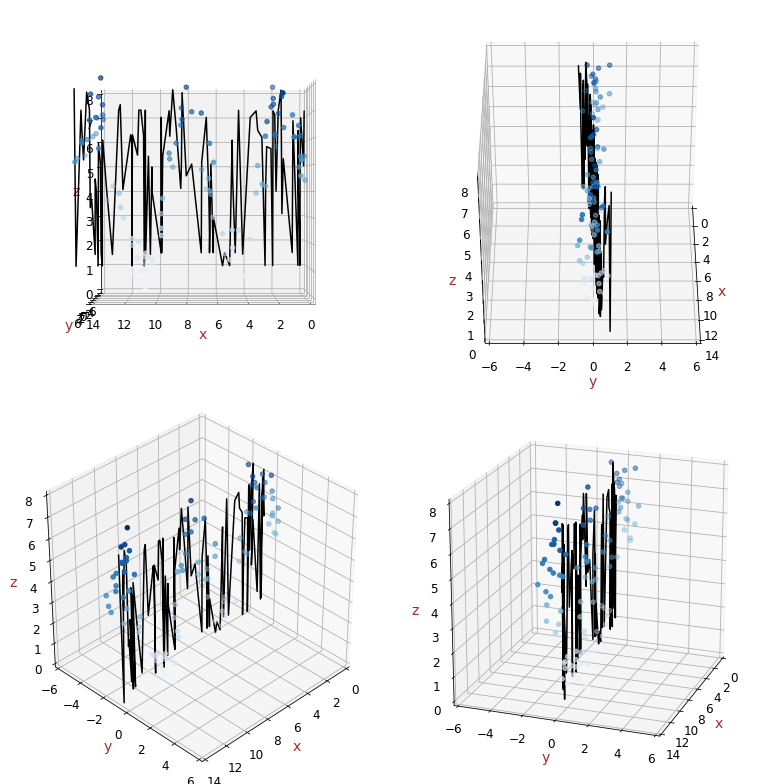

In [45]:
X_new1 = np.c_[train_df[0].ravel(), train_df[1].ravel()]
dtr.fit(X_new1, train_df[2])
fit_x=np.sort(train_df[0], axis=0)
fit_y=np.sort(train_df[1])
fit_z=dtr.predict(X_new1)
scat_x=train_df[0]
scat_y=train_df[1]
scat_z=train_df[2]
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

# Compute Generalization Error

Compute the generalization error for each of the optimal models above.  Use MSE as the generalization error metric.  Round your answers to four significant digits.  Print the generalization error for all three models.

In [ ]:
### ENTER CODE HERE ###